# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_mexico = df[(df['job_country']=='Mexico')].dropna(subset=['salary_year_avg']).copy()

In [4]:
#Get top 6 job titles in Mexico
job_titles = df_mexico['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Software Engineer']

In [5]:
df_mexico_top6 = df_mexico[df_mexico['job_title_short'].isin(job_titles)].copy()

In [11]:
# Find the median salary for the top 6 data jobs in Mexico
job_order = df_mexico_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Engineer',
       'Software Engineer', 'Data Scientist', 'Data Analyst'],
      dtype='object', name='job_title_short')

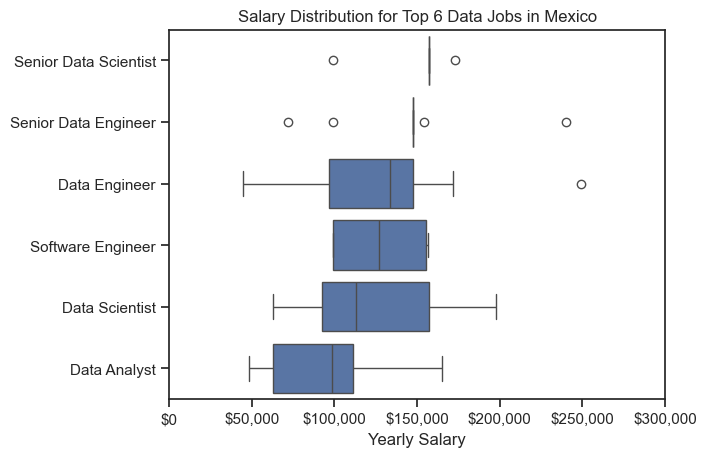

In [13]:
sns.boxplot(data=df_mexico_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution for Top 6 Data Jobs in Mexico')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter('${x:,.0f}')

## Median Salary Vs Skill for Data Analyst

In [15]:
df_median = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Mexico')].copy()

In [16]:
# Drop Na values in salary avg
df_median = df_median.dropna(subset=['salary_year_avg'])

In [17]:
# Explode the job_skills column to get individual skills
df_median = df_median.explode('job_skills')
df_median[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
5478,70500.0,sql
116903,99150.0,python
116903,99150.0,plotly
116903,99150.0,pandas
116903,99150.0,seaborn


In [20]:
# Top paying skills
df_top_pay = df_median.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)
df_top_pay

,count,median
job_skills,,
scala,2,147500.0
spark,2,129337.5
go,1,111202.0
kafka,1,111175.0
github,1,111175.0
looker,5,111175.0
sql,11,111175.0
python,8,111175.0
r,4,111175.0


In [22]:
# Most popular skills
df_top_skills = df_median.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
df_top_skills = df_top_skills.sort_values(by='median', ascending=False)
df_top_skills

,count,median
job_skills,,
python,8,111175.0
sql,11,111175.0
aws,3,111175.0
looker,5,111175.0
r,4,111175.0
excel,16,98825.0
power bi,12,89675.0
tableau,13,80850.0
sheets,7,57500.0


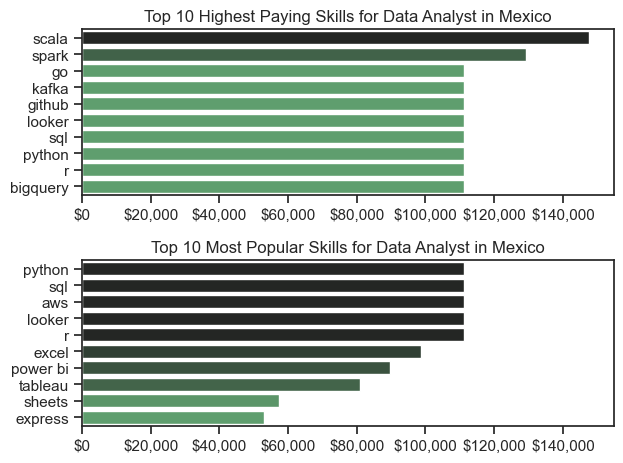

In [26]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# Top 10 highest paying skills
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:g_r')
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst in Mexico')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter('${x:,.0f}')
ax[0].legend().remove()

# Top 10 most popular skills
sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, ax=ax[1], hue='median', palette='dark:g_r')
ax[1].set_title('Top 10 Most Popular Skills for Data Analyst in Mexico')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter('${x:,.0f}')
ax[1].set_xlim(0, ax[0].get_xlim()[1])
ax[1].legend().remove()

plt.tight_layout()
plt.show()